# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 50 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 20 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GroupShuffleSplit

import warnings
import seaborn as sns
sns.set_theme(palette='Set2')
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

#### <b><font color="blue">Легкая часть</font></b>

### Задача 1


#### 1. Загрузка данных и предобработка

#### *Профиль биология*

Загрузите [данные](https://miptstats.github.io/courses/ad_mipt.html) по предсказанию рака груди. Поодробнее о них можно почитать в [источнике](https://www.kaggle.com/datasets/marshuu/breast-cancer).


In [53]:
data = pd.read_csv(r'C:\Users\ibeli\miptstats\sem4\breast_cancer_disbalances.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [6]:
data.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Как мы видим, пропусков нет

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

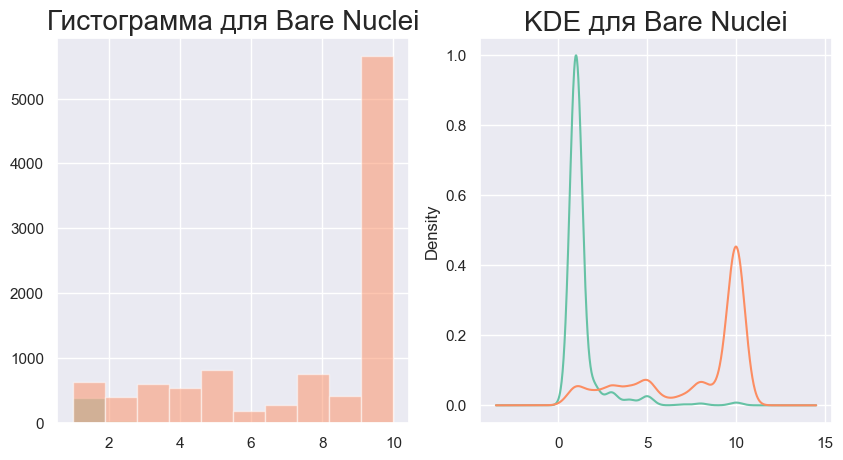

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], alpha=0.5)
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** 
Гистграмма отражает визуальное сравнение количеств элементов выборки, значения которых лежат в диапазонах, полученных разбиением изначального интервала всех значений на равные отрезки, разбиение задаётся параметром `bins`. Ядерная оценка плотности (ЯОП/KDE) позволяет оценить плотность распределения конечной выборки и приближает её гладкой функцией, с помощью функции ядра $K(x-x_i)$ зависящей от расстояния $x$ до соседей в каждой точке. Плотности вероятности имеют сравнимый масштаб, т.к. по поределению их интеграл по всему отрезку значений признаков одинаков и равен единице. Поэтому в каком-то смысле их графики являются более наглядными для сравнения

Значения признака `Bare Nuclei` для одного из классов сконцентрированы в интервале $(0;2)$ и его ЯОП имеет явный максимум в этом интервале и почти нулевая на остальной числовой прямой. В то время как значения признака для другого класса рассредоточены по всему интервалу значений более равномерно.

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

In [64]:
columns=data.drop('Class', axis=1).columns

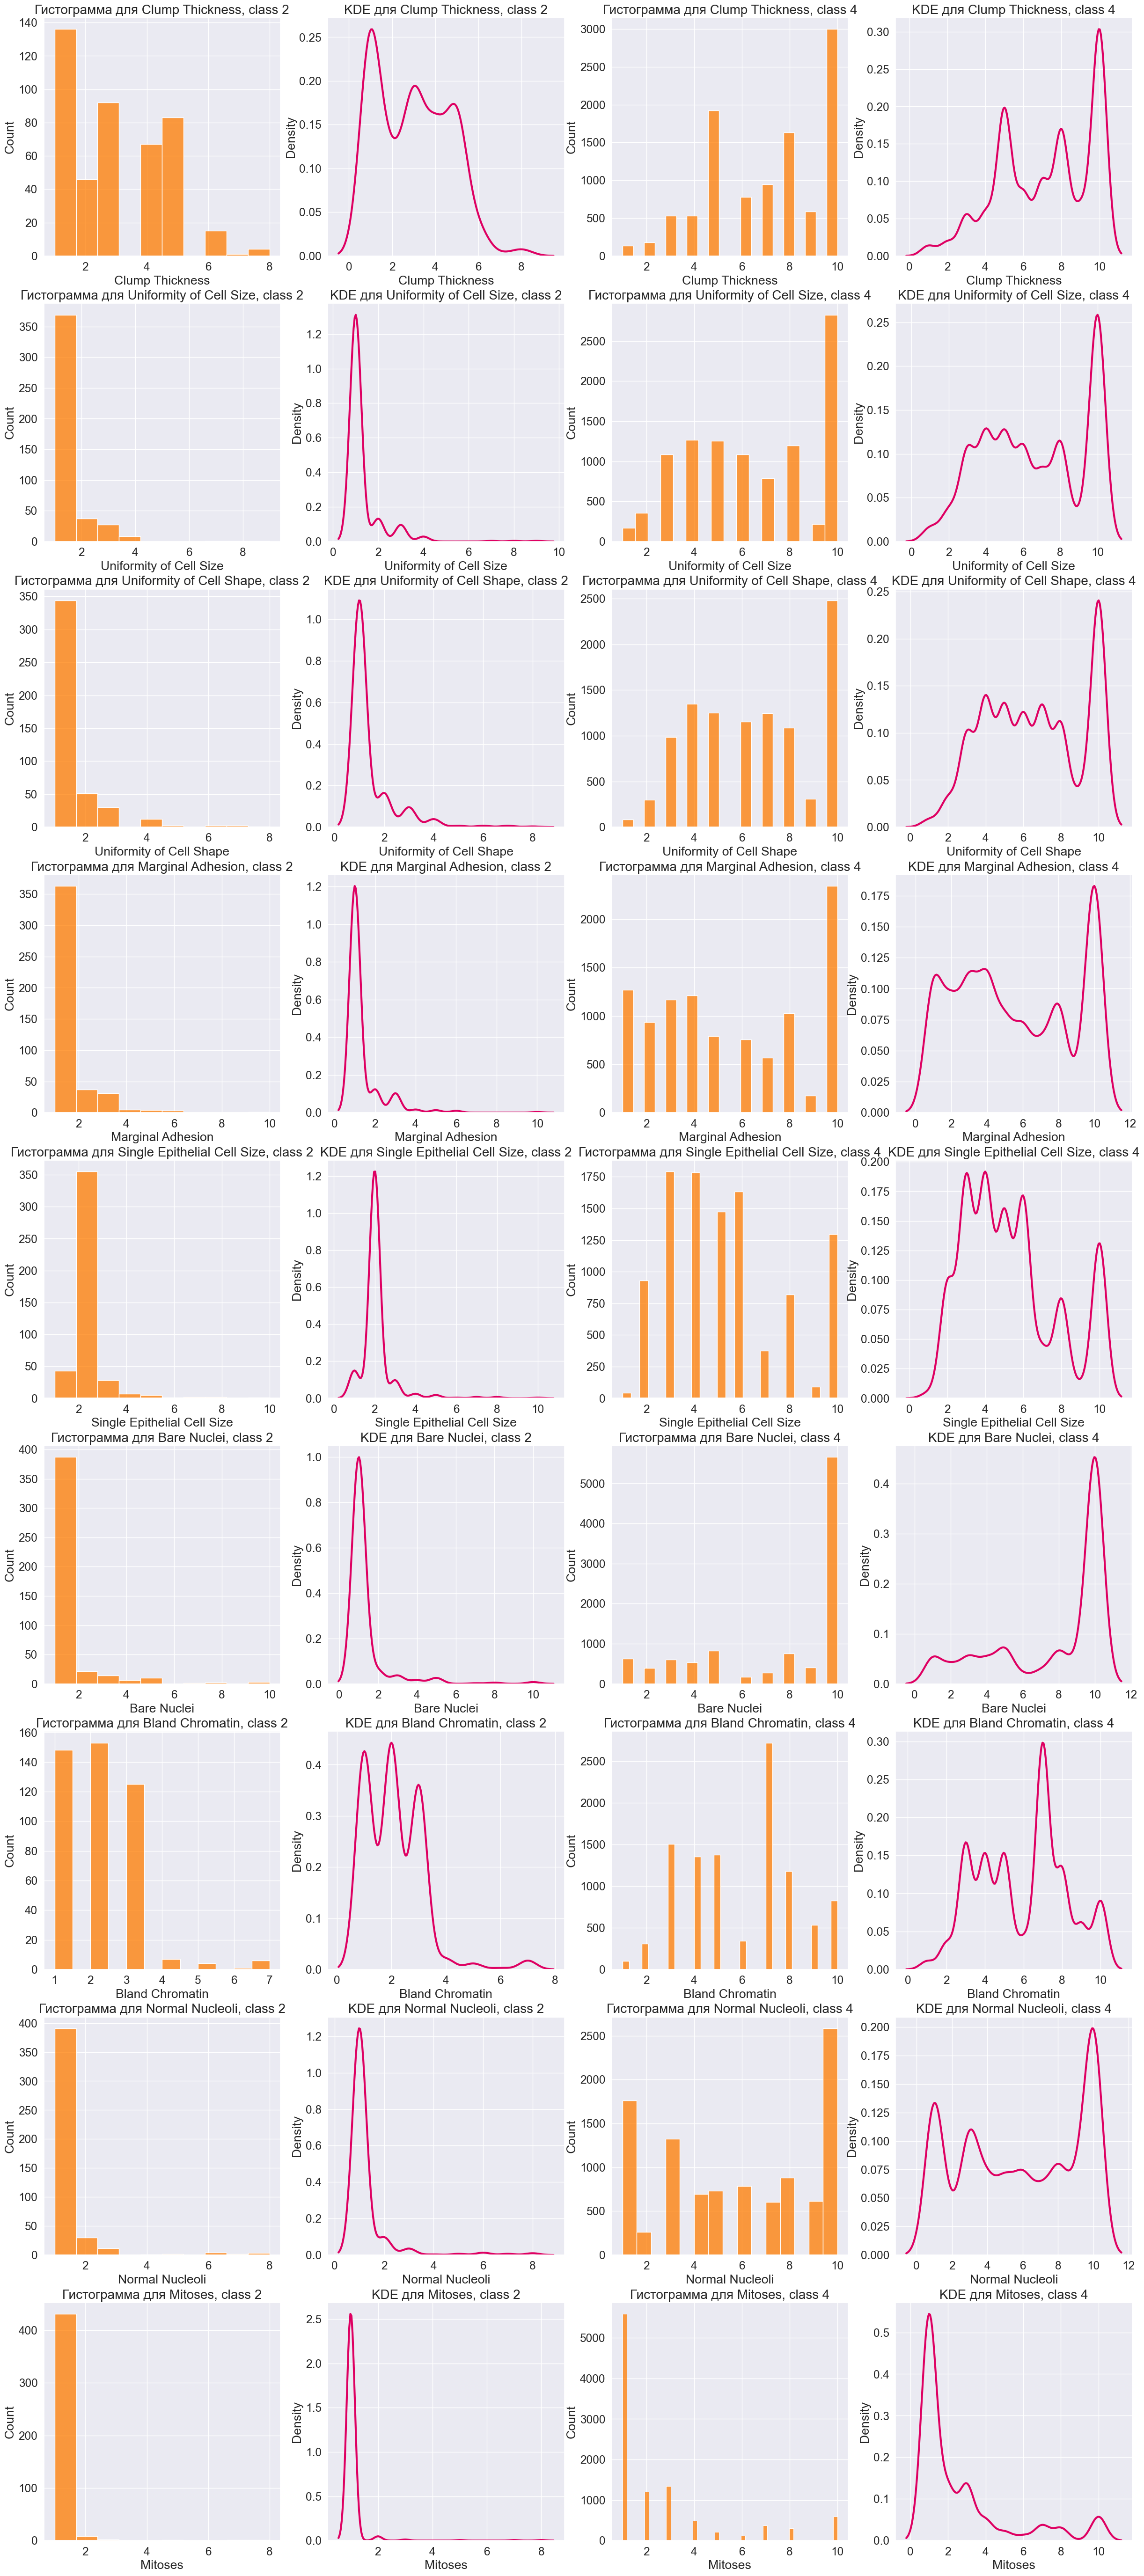

In [83]:
class_2=data[data['Class']==2]

class_4=data[data['Class']==4]

fig, axs = plt.subplots(figsize=(30,70), ncols=4, nrows=len(columns))

sns.set(font_scale=1.5)

for i in range(len(columns)):
    sns.histplot(data=class_2[columns[i]], ax=axs[i][0], color='#FF7C00')
    axs[i][0].set_title(f'Гистограмма для {columns[i]}, class 2', fontsize=20)
    axs[i][1].set_title(f'KDE для {columns[i]}, class 2', fontsize=20);
    sns.kdeplot(class_2[columns[i]], lw=3, ax=axs[i][1], color='#DE0062')
    sns.histplot(data=class_4[columns[i]], ax=axs[i][2], color='#FF7C00')
    axs[i][2].set_title(f'Гистограмма для {columns[i]}, class 4', fontsize=20)
    axs[i][3].set_title(f'KDE для {columns[i]}, class 4', fontsize=20);
    sns.kdeplot(class_4[columns[i]], lw=3, ax=axs[i][3], color='#DE0062')
    
plt.show()

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** На полученных графиках видно, что для класса 2 подавляющее большинство значений всех признаков лежит в левой части гистограм в интервале $(0;3)$ и их ЯОП имеют максимумы в левой половине интервала значений и принимают почти нулевые значения в правой половине. 

Для класса 4 Значения признаков распределены более равномерно и их ЯОП в основном не имеют явно выраженного максимума слева.

Также исходя из полученных графиков KDE можно сделать вывод, что самым дифференцируемым явлеется признак `Bare Neclei`

**Это не конец задачи! Переходите к пункту 2!**

#### *Профиль физика*

Загрузите данные по бинарной классификации астероидов в зависимости от различных параметров с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>.

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data). Можно заметить, что наш датасет сильно меньше по размерам, чем оригинал. Это сделано намеренно.

In [ ]:
data = pd.read_csv('dataset_savaged.csv')
data.info()

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `rms` для разных классов:

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['rms'].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")['rms'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для rms', fontsize=20)
axs[1].set_title('KDE для rms', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** <...>

Постройте гистограммы и ядерные оценки плотности для указанных ниже признаков отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

In [ ]:
features = ['epoch', 'ma', 'tp', 'rms']
<...>

Какие выводы вы можете сделать из полученных графиков?

**Вывод:**<...>

#### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.


In [9]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [12]:
scaler = StandardScaler()

# Нормируем train и test.

X_train = scaler.fit_transform(X_train)

#К тестовой выбоке применяем метод .transform

X_test = scaler.transform(X_test)

Объясните, что делает `StandardScaler` и почему его нельзя обучать на тестовой выборке?

**Ответ:** `StandartScaler` нужен для того, чтобы сделать все данные сравнимыми по величине, что в свою очередь нужно для корректной работы регуляризации при произвольных наборах данных в различных классах. `StandartScaler` вычитает из каждого $j-\text{го}$ элемента тестовой выборки матожидание по $j-\text{му}$ столбцу данного признака и делит его на корень из дисперсии. Таким образом все преобразованные после применения метода `.tarnsform` велечины оказываются сравнимыми между собой.

Метод `.fit` применяется к выборке, по которой мы обучаем нашу модель и по которой `StandartScaler` учится преобразовывать данные, а тестовая выборка нужна чтобы проверить и достоверно оценить работу нашей модели, поэтому применяя к ней `.fit` мы получим некорректный результат.

Обучите модель логистической регрессии.

In [13]:
model_log = LogisticRegression(fit_intercept=True)

model_log.fit(X_train, y_train)

LogisticRegression()

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания, рассмотрите метрики: `accuracy_score`, `precision` и `recall`.

Если названия ваших классов отличаются от 0 и 1, то надо использовать аргумент `pos_label`.

In [30]:
y_pred = model_log.predict(X_test)

ac=accuracy_score(y_test, y_pred) 

pr=precision_score(y_test, y_pred, pos_label=2)

re=recall_score(y_test, y_pred, pos_label=2)

print(ac,pr,re)

0.9968798751950078 1.0 0.927536231884058


Можем ли порадоваться таким результатам? Вернемся к гистограммам и сделаем вывод, почему метрики оказались такими большими:

Из графиков ЯОП видно, что пики плотностей вероятности для разных классов сильно разнесены на прямой и в основном не пересекаются. Это говорит о том, что классы в основном не пересекаются. Поэтому данные значения метрик не совсем достоверно отражают качество модели, т.к. почти все элементы выборки представители `Class 4`

#### 3. Учтём дисбаланс классов
Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборках:

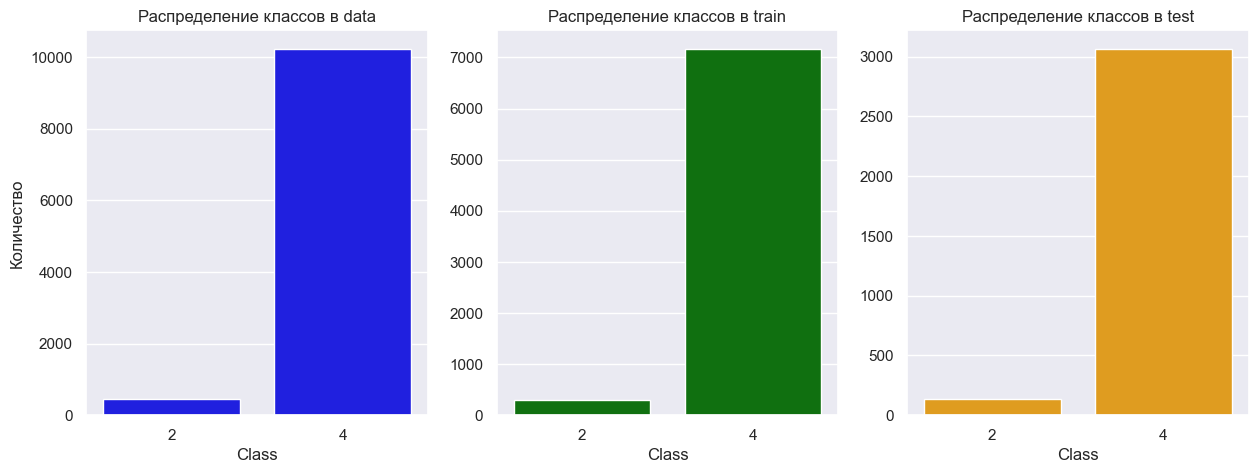

In [31]:
original = data['Class'].value_counts() # Колонка таргета из изначального датасета
train = y_train.value_counts() # Колонка таргета из тренировочного датасета
test = y_test.value_counts() # Колонка таргета из тестового датасета

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=original.index, y=original.values, ax=axes[0], palette=['blue'])
axes[0].set_title('Распределение классов в data')
axes[0].set_ylabel('Количество')

sns.barplot(x=train.index, y=train.values, ax=axes[1], palette=['green'])
axes[1].set_title('Распределение классов в train')

sns.barplot(x=test.index, y=test.values, ax=axes[2], palette=['orange'])
axes[2].set_title('Распределение классов в test')

plt.show()

Видно, что в данных есть сильный перекос — классы представлены неравномерно. Как и почему это повлияло на наши результаты?

**Ответ:** Все используемые метрики зависят от числа элементов выборки, по которой обучена модель. Если 95% выборки принадлежит классу 4 и для этого класса все предсказания верны, а для класса 2 - нет, то это не сильно отразится на занчении метрики качества оценки, т.к. объекты всех классов имеют одинаковые веса.

Есть много способов борьбы с этим. Можно искусственно сгенерировать данные нужного класса или урезать другой класс. Однако сегодня мы воспользуемся ***взвешенной*** логистической регрессией. Суть метода заключается в том, чтобы вручную поставить веса для классов, исходя из их предполагаемой природы: важность разных классов, цена ошибки в реальной жизни (например, что хуже: предсказать наличие рака, если он есть или нет?) и представленность данных.

Функция потерь &mdash; в нашем случае логарифм функции правдоводобия &mdash; для взвешенной логистической регресси будет записана как:

$$
L(y, \widehat{y}) = \sum_{i=1}^{N} w_{y_i} \cdot \left[ y_i \cdot \log(\sigma(\widehat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\widehat{y}_i)) \right]
$$

где:


- $ y_i $ - истинный класс для образца  $i$
- $ \widehat{y}_i $ - предсказанный класс для образца $i$
- $ w_{y_i} $ - вес класса



Давайте реализуем этот метод. Допишите код и в качестве весов класса  поставьте соотношение их представленности. Выведите подсчет количества экземпляров каждого класса и посчитайте их соотношение.

Выведем долю элементов каждого класса:

In [45]:
data['Class'].value_counts(1)

Class
4    0.958439
2    0.041561
Name: proportion, dtype: float64

In [44]:
threshold = data['Class'].value_counts(1)[4]

class_weights = {2: threshold, 4: 1 - threshold}
# если использовать class_weights = 'balanced', модель сама подсчитает веса

weighted_model = LogisticRegression(class_weight=class_weights)

Посчитайте метрики качества. `Accuracy` посчитайте двумя способами: без учёта и [с учётом весов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html). 

In [48]:
weighted_model.fit(X_train, y_train)

y_wpred=weighted_model.predict(X_test)

accuracy=accuracy_score(y_test, y_wpred)

precision=precision_score(y_test, y_wpred, pos_label=2)

recall=recall_score(y_test, y_wpred, pos_label=2)

print(f"accuracy = {accuracy} \naccuracy без весов = {ac}

\nprecision = {precision} \nrecall = {recall}")

accuracy = 0.9800312012480499 
accuracy без весов = 0.9968798751950078 
precision = 0.6947368421052632 
recall = 0.9565217391304348


Как изменилось качество нашей модели? Почему надо учитывать несбалансированность данных?

Сделайте общий вывод по задаче.

**Вывод:** Нетрудно заметить, что метрики качества модели заметно уменьшились. Однако это не плохо, данные значения являются более информативными. Несбалансированность данных нужно учитывать для корректных предсказаний на всей тестовой выборке, а не только по одному из классов. Иначе значения метрик качества будут завышены, как было продемонстрировано выше. Задание классам весов, пропорциональных их весам является хорошим решением проблемы.

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; `Lasso`, `Ridge`, `Elastic Net`.  

При выполнении задания воспользуйтесь готовыми реализациями методов в `sklearn`. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [10]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """
    Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """
    
    alphas = np.logspace(log_min, log_max, num) # сетка параметров   
    coefs = [] # коэффициенты моделей
    for a in alphas:
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(10, 5)):
    
    """
    Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param coefs: коэффициенты модели
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона
    :param title: название графика
    :param figsize: размеры рисунка

    :return coefs: коэффициенты модели
    """
    alphas = np.logspace(log_min, log_max, num) # сетка параметров  

    plt.figure(figsize=figsize)
    ax = plt.gca() # используется для получения текущего экземпляра axes
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
        ind += 1
        
    ax.set_xscale('log') # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### 1. Загрузка данных

#### *Профиль биология*

Скачайте данные с [сайта](https://miptstats.github.io/courses/ad_mipt.html). Оригинал вместе с описанием можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring). Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей. 

In [3]:
data2 = pd.read_csv('parkinsons_updrs.data', sep=',')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков. 

Также обратите внимане, что в данных есть группы (пациенты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [4]:
data2.drop('motor_UPDRS', axis=1, inplace=True)

#Параметр inplace позволяет изменить сам DataFrame

X = data2.drop(['total_UPDRS', 'subject#'], axis=1)

y = data2['total_UPDRS']

group = data2.drop_duplicates(subset=['subject#'])['subject#'].values


In [5]:
group

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

Разбейте данные на обучающую и тестовую выборки в соотношении 7:3. Здесь не подойдет стандартный метод `test_train_split`, так как в данных есть группы. *Нельзя допускать, чтобы разные записи для одного пациента попали в разные подвыборки*.

**Также, выведите что-либо, подтверждающее данное свойство.**



In [7]:
groups = data2["subject#"]
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(gss.split(X, y, groups=groups))

#Проверим, что для любого пациента его данные лежат в пределах одной выборки
for i in group:
    
    num=data2.index[data2['subject#']==i]
    
    a=0
    
    if set(num).intersection(train_index) & set(num).intersection(test_index) != set():
        a +=1        

if a == 0:
    print('OK')

else:
    print('Wrong')

OK


Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку. 

**Переходите к пункту 2.**

#### *Профиль физика*

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице в сжатом виде, которые действуют как молекулярные признаки. 0-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа. Этот столбец возьмем в качестве индекса строк. Последний столбец `Eat` — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso. Этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*.

In [ ]:
data = pd.read_csv('physics_data.csv', index_col=0)
data.head()

Разделите данные на признаки $X$ и целевые переменные $y$. **Для дальнейших заданий оставьте 20 признаков.**

In [ ]:
<...>

Разделите выборку в отношении 7:3. Далее везде, вплоть до сравнения моделей, используйте обучающую выборку.

In [ ]:
X_train, X_test, y_train, y_test = <...>

Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку. 


#### 2. Влияние регуляризации на коэффициенты моделей

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [8]:
X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],  y.loc[train_index], y.loc[test_index]

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

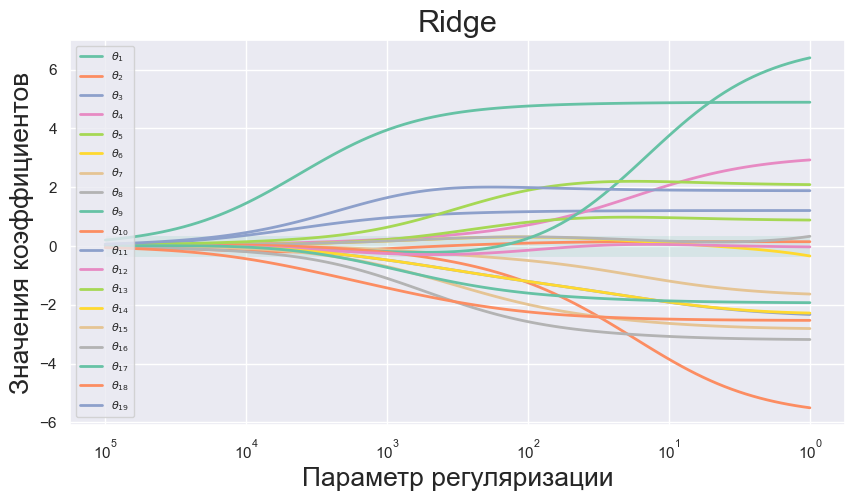

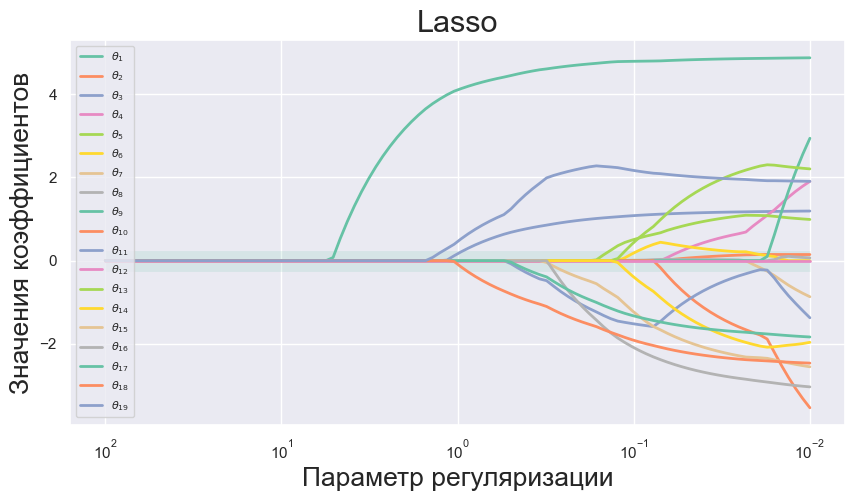

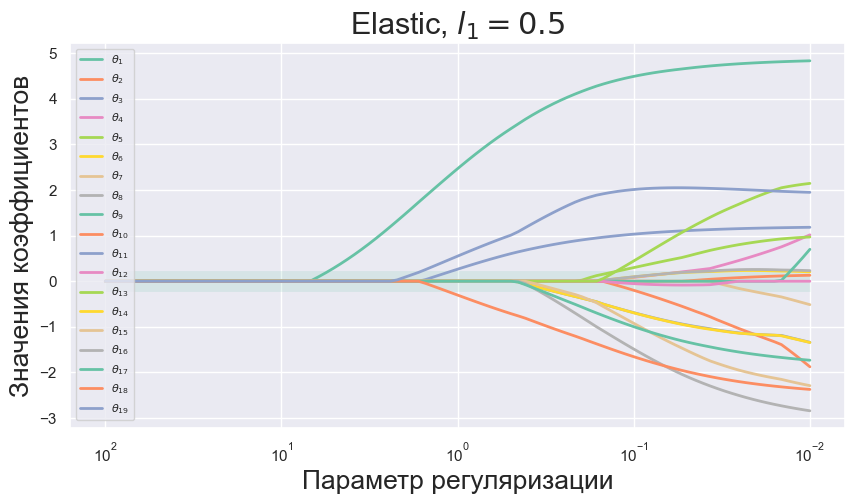

In [11]:
# Ridge регрессия
# инициализация и обучение моддели
ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

# коэффициенты регрессии
ridge_coefs = calculate_coef(ridge_model, X_train, y_train, 0, 5, 100)

# отрисовка
draw_track(ridge_coefs, 0, 5, 100, title='Ridge')


# Lasso регрессия
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

lasso_coefs = calculate_coef(lasso_model, X_train, y_train, -2, 2, 100)

draw_track(lasso_coefs, -2, 2, 100, title='Lasso')

# Elastic регрессия
elastic_model = ElasticNet(l1_ratio=0.5) # установите какое-то значение l1_ratio
elastic_model.fit(X_train, y_train)

elastic_coefs = calculate_coef(elastic_model, X_train, y_train, -2, 2, 100)

draw_track(elastic_coefs, -2, 2, 100, title='Elastic, $l_1 = 0.5$')

**Ответ:** Вероятнее всего стоит искать значения параметра регуляризации $\theta$ в диапазоне $[1;100]$ для `Ridge` регресии , в диапазоне $[10^{-1};10]$ для `Lasso` регрессии и в диапазоне $[10^{-2}; 10]$ для `Elastic` регрессии. В этих диапазонах Ridge сохраняет информацию о зависимости признаков, Lasso - позволяет настроить модель, чтобы она не зануляла все коэффициенты кроме одного, самого большого, делая её более вариативной под различные выборке. А Lasso как линейная комбинация предыдущих регрессий позволяет работать в чуть более широком диапазоне параметров, чем Lasso

Посмотрите, как выглядят графики без стандартизации. Почему так происходит?

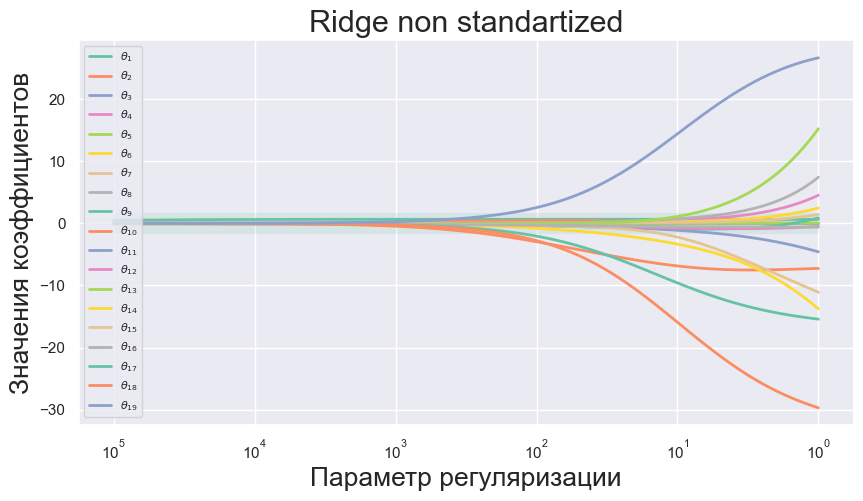

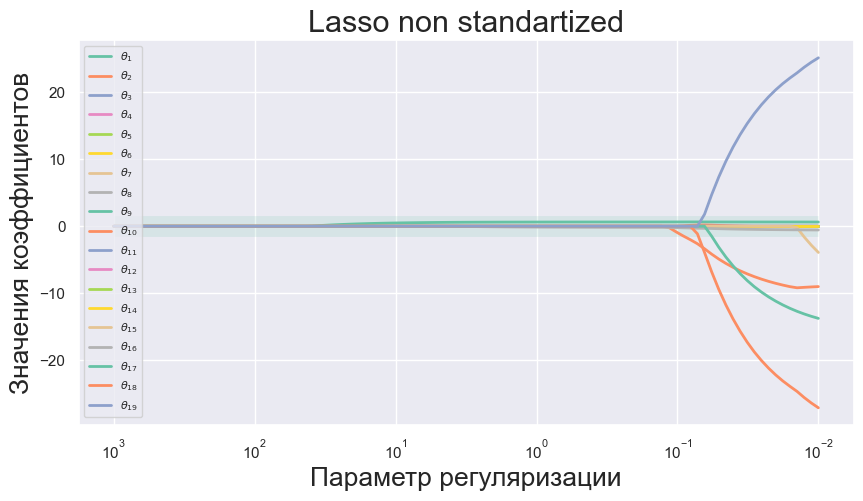

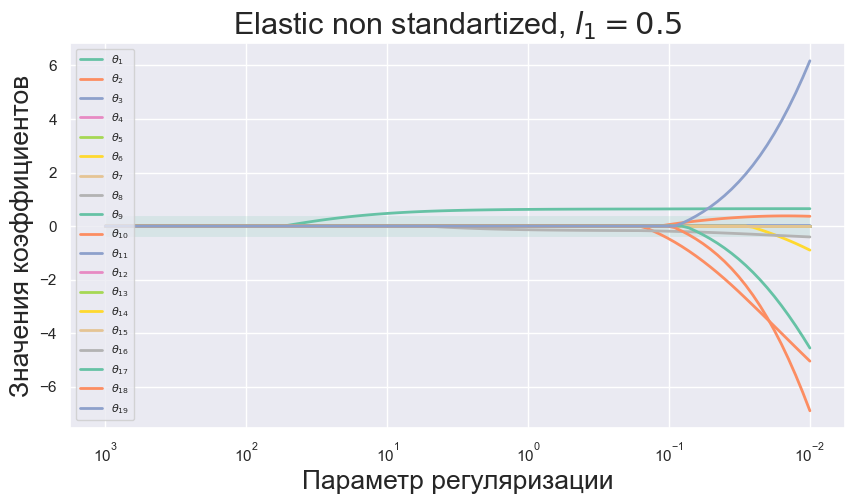

In [12]:
X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],  y.loc[train_index], y.loc[test_index]

# Ridge регрессия
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_coefs = calculate_coef(ridge_model, X_train, y_train, 0, 5, 100)

draw_track(ridge_coefs, 0, 5, 100, title='Ridge non standartized')


# Lasso регрессия
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

lasso_coefs = calculate_coef(lasso_model, X_train, y_train, -2, 3, 100)

draw_track(lasso_coefs, -2, 3, 100, title='Lasso non standartized')

# Elastic регрессия
elastic_model = ElasticNet(l1_ratio=0.5) # установите какое-то значение l1_ratio
elastic_model.fit(X_train, y_train)

elastic_coefs = calculate_coef(elastic_model, X_train, y_train, -2, 3, 100)

draw_track(elastic_coefs, -2, 3, 100, title='Elastic non standartized, $l_1 = 0.5$')

**Ответ:** Можно заметить более быстрое уменьшение значений коэффициентов с ростом $\alpha$ при отсутствии стандартизации. Это связано с тем, что без нормировки полученные коэффициенты в основном изначально принимают сильно бОльшие значения, чем со стандартизацией. Также из-за отсутствия нормировки коэффициенты перестают иметь одинаковый масштаб, что приводит к дисбалансу коэффициентов, т.к. какие-то из них модель стремится занулить сильнее.

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

Для начала следует заново стандартизовать значения признаков для достоверности полученных результатов в рамках **Задачи 3**

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

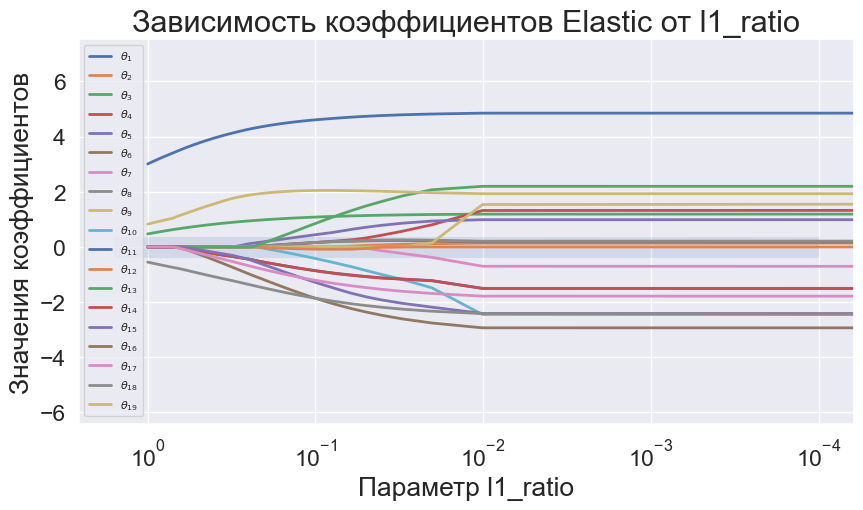

In [179]:
grid = np.linspace(0, 1, 100) #Сетка параметров
coefs = []                    #Коэффициенты моделей
model = ElasticNet()          #Модель из Sklearn

for l1_ratio in grid:
    model = ElasticNet(l1_ratio)  # Задайте новый параметр модели
    model.fit(X_train, y_train) # Обучите
    coefs.append(model.coef_)   # Добавьте в список

# Для визуализации используем код из функции draw_track

plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.hlines(0, 10 ** (-4), 10 **(0.2), linewidth=15, alpha=0.15)
ind = 1
for coef in np.array(coefs).T:
    label = r'$\theta_{' + str(ind) + '}$'
    ax.plot(grid, coef, linewidth=2, label=label)
    ind += 1
        
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Параметр l1_ratio', fontsize=19)
plt.ylabel('Значения коэффициентов', fontsize=19)
plt.title('Зависимость коэффициентов Elastic от l1_ratio', fontsize=22)
plt.legend(loc='upper left', fontsize=8)
plt.axis('tight')
plt.show()

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:** На полученном графике наблюдается рост коэффициентов регрессии $\theta_i$ при уменьшении параметра $l_1$. Исходя из этого можно предположить, что оптимальным диапазоном параметров регуляризации будет: $l_1 \in [10^{-0.5};10^0] \approx [0.3;1]$. В этом диапазоне значения параметров наименьшее, а рост с уменьшением $l_1$ - наибольший, что даёт модели определённую гибкость.
Но в общем это сильно зависит от выбора задачи и, как следствие, выбора метрики для максимизации.

**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

***Физика:*** Для этого задания возьмите полный датасет &mdash; все 300 признаков.

In [ ]:
<...>

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [14]:
linreg = {}

model_lin = LinearRegression().fit(X_train, y_train)

y_pred = model_lin.predict(X_test)

linreg['MSE'] = mean_squared_error(y_test, y_pred)
linreg['MAE'] = mean_absolute_error(y_test, y_pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_test, y_pred)

Допишите функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [24]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = [Ridge(alpha=a),
                  Lasso(alpha=a),
                  ElasticNet(alpha=a, l1_ratio=0.2),
                  ElasticNet(alpha=a, l1_ratio=0.5),
                  ElasticNet(alpha=a, l1_ratio=0.8)] 
        for model in models:
            
            # обучение модели и предсказание 
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names = ['Ridge', 'Lasso', 'Elastic, $l_1 = 0.2$',
             'Elastic, $l_1 = 0.5$', 'Elastic, $l_1 = 0.8$'] 
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha

    # прерывистой линией рисуем ошибки логрега без регуляризации
    plt.hlines(linreg[error_name], alphas[0], alphas[-1], color='black', label = 'No regularization', linestyles='dashed')
    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [25]:
alphas = np.logspace(-2, 8, 20)

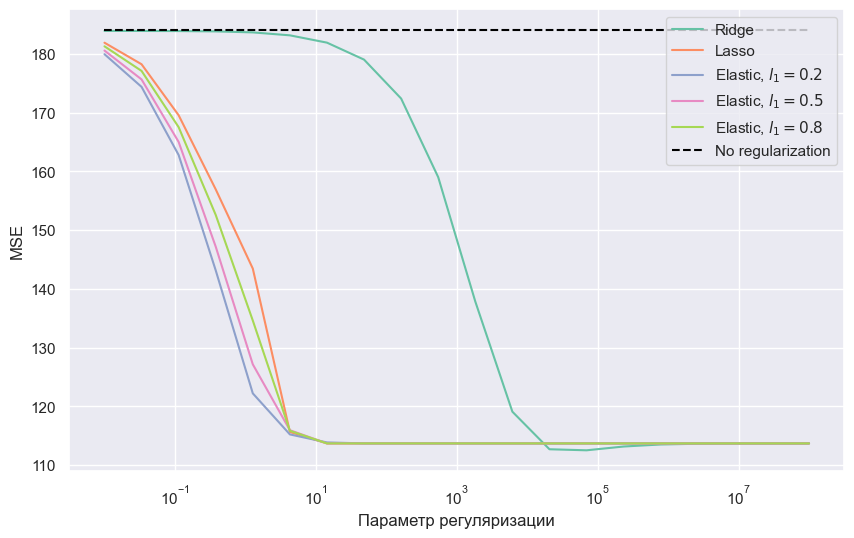

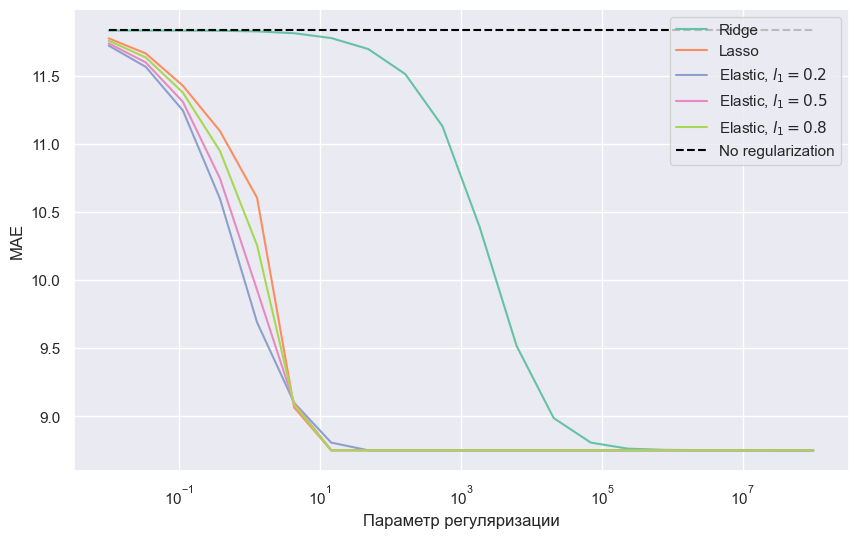

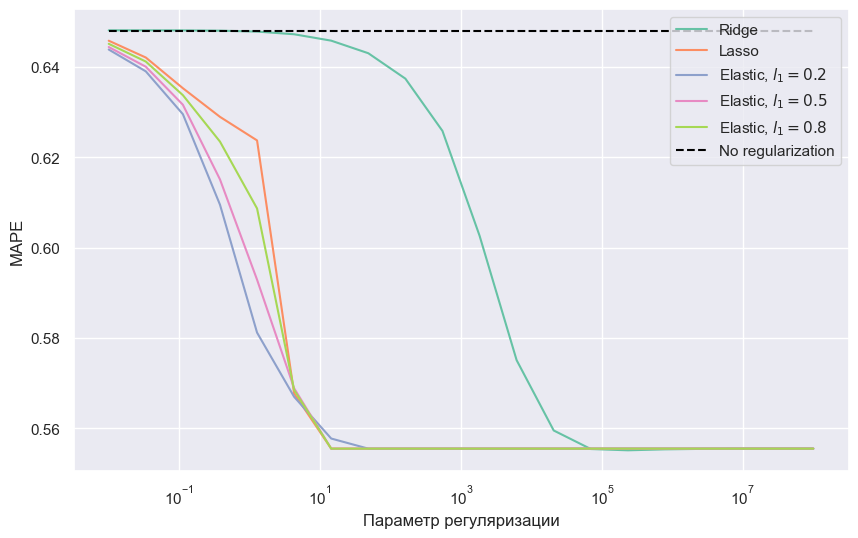

In [26]:
# вложите в функции метрики

draw_errors(mean_squared_error, "MSE", alphas)
draw_errors(mean_absolute_error, "MAE", alphas)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas)

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

Видно, что с ростом параетра регуляризации $\alpha$ качество моделей улучшается по результатам всех 3х метрик

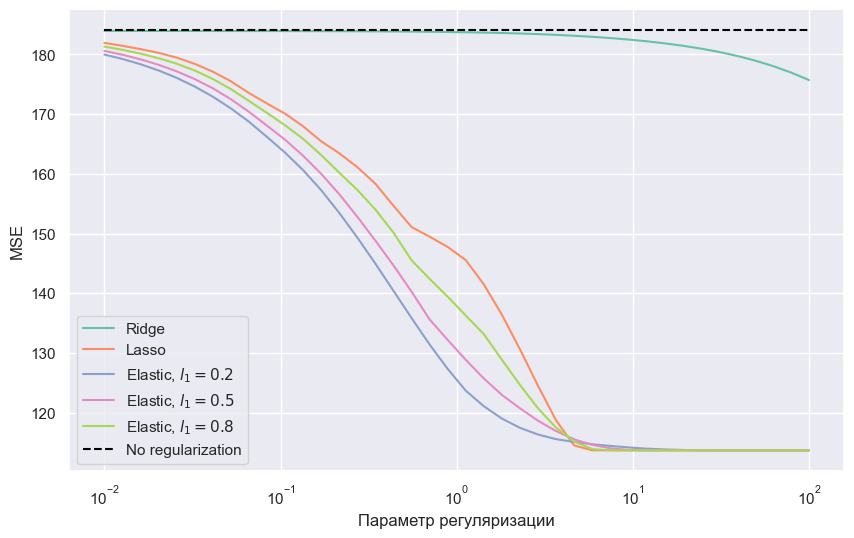

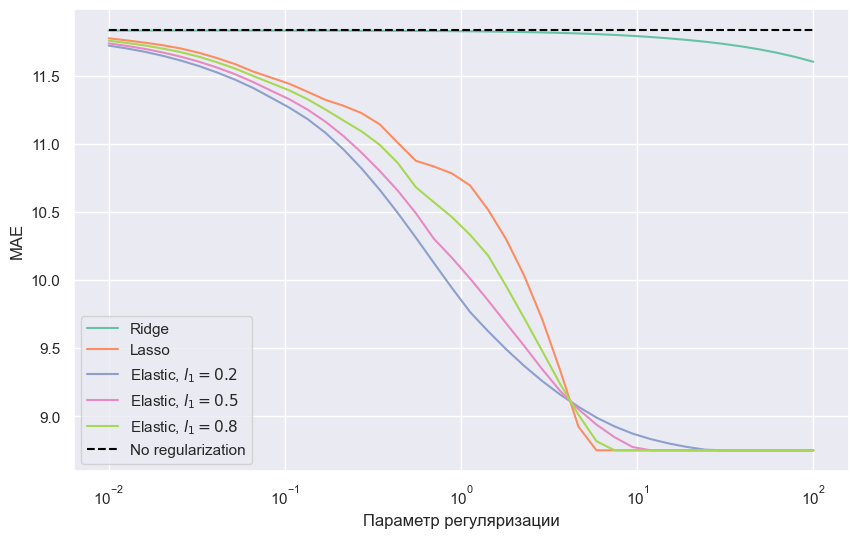

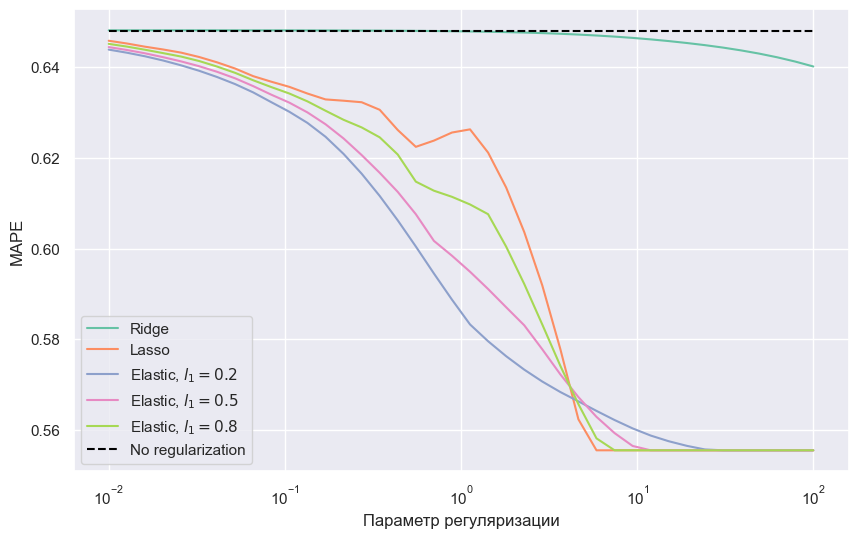

In [27]:
alphas2 = np.logspace(-2, 2, 40)
#Более узкий диапазон параметров
draw_errors(mean_squared_error, "MSE", alphas2)
draw_errors(mean_absolute_error, "MAE", alphas2)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas2)

**3.** Сделайте общий вывод по задаче. 

Укажите: в чем разница между `L1` и `L2` регуляризациями, как реализуется регуляризация в `ElasticNet`, что такое `l1-ratio` и зачем нужен, как это видно в наших графиках. (Своими словами)

**Вывод:** Регуляризация позволяет решить проблемму мультиколлинеарности, то есть линейной зависимости признаков и даже на такой выборке реализовать относительно успешную оценку с помощью модели линейной регрессии. Таким образом имеет смысл использовать регуляризацию в случае, когда число признаков $d$ больше числа элементов выборки $n$, то есть при переобучении. 

`L1` регуляризация минимизирует 1ю норму $\theta$, то есть сумму модулей всех коэффициентов $\theta_i, i=1...d$, а `L2` минимизирует 2ю норму $||\theta||=|\theta|^2 = \theta^T \theta$. Из графиков и аналитических свойств 1й и 2й норм видно, что `L1` резко зануляет все коэффициенты, начиная с самого меньшего, а `L2` зануляет все коэффициенты совместно и более равномерно.

`ElasticNet` является линейной комбинацией двух предыдущих регуляризаций. Она минимизирует величину $\alpha_1||\theta||_1 + \alpha_2||\theta||_2$, параметр `l1_ratio` задаёт соотношение между $\alpha_1 $ и $\alpha_2$ : $l_1 = \frac{\alpha_1}{\alpha_1 + \alpha_2}$. Таким образом параметр $l_1 \in [0;1]$ позволяет сделать нашу модель более гибкой: при $l_1 \longrightarrow 0$ модель приближается к `Ridge` регрессии, а при $l_1 \longrightarrow 1$  к `Lasso` регрессии соответственно, что видно на приведённых выше графиках.

## Задача 4


Регуляризацию успользуют не только в задачах регрессии, но и в задачах классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция *правдоподобия*, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Мы получили логистическую регрессию c **$l_2$-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому такого понятия как "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение*,согласно выбранной метрике.

Выведите формулу поиска оценки коэффициентов методом *градиентного подъёма* и *стохастического градиентного подъёма* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

**Решение:**
    
1) Во первых стоит заметить, что функция $log: x \longrightarrow log(x)$ является строго возрастающей на всей области определения, а значит её максимум совпадает с максимумом функции правдоподобия $L_Y (\theta)$. Однако здесь лучше воспользоваться этим в обратную сторону, так как $\ell_Y(\theta) = \log L_Y(\theta)$ переводит произведение в сумму, а сумму дифференцировать намного удобнее.

    Градиент логарифма функции правдоподобия $\ell_Y$:
    $$
    \text{grad}\ \ell_Y(\theta) = \sum\limits_{i=1}^n\left(Y_i-\sigma(\theta^Tx_i)\right)x_i
    $$
    Формула градиентного подъёма без регуляризации:
    $$
    \theta_{k+1} - \theta_k = \eta\ \text{grad}\ \ell_Y(\theta_k) \Rightarrow
    \theta_{k+1} - \theta_k = \eta\ \sum\limits_{i=1}^n\left(Y_i-\sigma(\theta^Tx_i)\right)x_i
    $$
    
   Аналогичное выражение для градиентного подъёма с регуляризацией будет отличаться только на производную от $\alpha ||\theta||_2$:
   $$
   \theta_{k+1} - \theta_k = \eta\ \sum\limits_{i=1}^n\left(\left(Y_i-\sigma(\theta^Tx_i )\right)x_i- 2\alpha\theta_k\right)
   $$